In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional,GlobalMaxPool1D,SpatialDropout1D,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Input

from keras.preprocessing.sequence import pad_sequences
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter
import itertools
import string

from sklearn.model_selection import train_test_split


from joblib import dump, load
from nltk.stem.isri import ISRIStemmer
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from time import time
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from tensorflow.keras.utils import to_categorical
import os
import pickle

In [42]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from time import time

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# data import 

In [53]:
import pandas as pd

df1 = pd.read_table('./Datasets/english/twitter-2016train-CE.txt' , usecols=[0,1,2,3], encoding='utf-8', names=['id','topic','sentiment', 'tweet'])
df2 = pd.read_table('./Datasets/english/twitter-2016test-CE.txt' , usecols=[0,1,2,3], encoding='utf-8', names=['id','topic','sentiment', 'tweet'])
df = pd.concat([df1, df2], axis=0,ignore_index=True)
#dataTest = pd.read_table('../input/semevalll/SemEval2017-test.txt', usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])                   
#combine = [dataTrain,dataTest]
df

,id,topic,sentiment,tweet
0,628949369883000832,@microsoft,-1,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,@microsoft,-2,@Microsoft how about you make a system that do...
2,629023169169518592,@microsoft,-1,I may be ignorant on this issue but... should ...
3,629179223232479232,@microsoft,-1,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,@microsoft,0,If I make a game as a #windows10 Universal App...
...,...,...,...,...
26495,634711870570500096,zayn,1,with Zayn gone I can now definitively say that...
26496,637134671797690368,zayn,1,yo don't ever say that! god forbid! may it not...
26497,636413565780557824,zayn,1,you may call me a bad fan but I sobbed so hard...
26498,634633336124776448,zayn,1,"zayn's voice: c'mon guys you can do it, nobody..."


In [16]:
CATEGORY_INDEX = {
    "-2": 'very negative',
    "-1": 'negative',
    "0": 'neutral',
    "1":"positive",
    "2":"very positive"
}


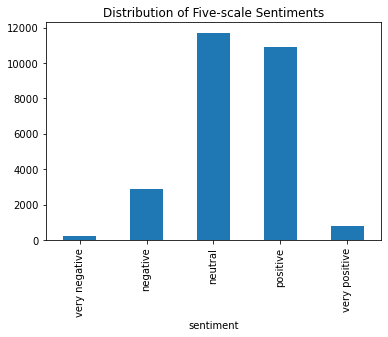

In [23]:
groups = df.groupby('sentiment').count()   # beautiful graph

groups['tweet'].plot(kind='bar')
x = range(0,5,1)
plt.xticks(x, ('very negative', 'negative', 'neutral',"positive","very positive"))
plt.title('Distribution of Five-scale Sentiments')
plt.show()


## plot1

In [ ]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []
neutral_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words seperately
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    elif cleaned_tokens_list[i][1] == -1:
        negative_words.extend(cleaned_tokens_list[i][0])
    elif cleaned_tokens_list[i][1] == 0:
        neutral_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black',title = 'positive'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 1500,
                          height = 1000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./data/cloud_%s.jpg'%title)
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white',title = 'positive')
print("Negative words")
wordcloud_draw(negative_words,title = 'nagative')        
print("Neutral words")
wordcloud_draw(neutral_words,'ghostwhite',title = 'neutral') 

print('CPU Time:', time() - start_time)

## plot2

In [ ]:
sentiments = ["positive","negative","neutral"]
plots_data_ef = []
for what in map(lambda o: "number_of_"+o,["positive_emo","negative_emo","exclamation","hashtags","question"]):
    ef_grouped = data_model[data_model[what]>=1].groupby(["label"]).count()
    plots_data_ef.append({"data":[graph_objs.Bar(
            x = sentiments,
            y = [ef_grouped.loc[s,:][0] for s in sentiments],
    )], "title":"How feature \""+what+"\" separates the tweets"})
    

for plot_data_ef in plots_data_ef:
    plotly.offline.iplot({
            "data":plot_data_ef["data"],
            "layout":graph_objs.Layout(title=plot_data_ef["title"])
    })

In [ ]:
def plot(all_words, title):
    counted_words = Counter(all_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(25):
        words.append(letter)
        counts.append(count)

    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

# add label

In [24]:
df_back = df.copy()
df_back

,id,topic,sentiment,tweet
0,628949369883000832,@microsoft,-1,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,@microsoft,-2,@Microsoft how about you make a system that do...
2,629023169169518592,@microsoft,-1,I may be ignorant on this issue but... should ...
3,629179223232479232,@microsoft,-1,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,@microsoft,0,If I make a game as a #windows10 Universal App...
...,...,...,...,...
26495,634711870570500096,zayn,1,with Zayn gone I can now definitively say that...
26496,637134671797690368,zayn,1,yo don't ever say that! god forbid! may it not...
26497,636413565780557824,zayn,1,you may call me a bad fan but I sobbed so hard...
26498,634633336124776448,zayn,1,"zayn's voice: c'mon guys you can do it, nobody..."


# data preprocessing

## 1 data cleansing 

In [25]:
df = df.dropna()

In [26]:
def clean_base(tweets, clean_object):
        #tweets.loc[:, "tweet"].replace(clean_object, "", inplace=True)
        tweets = re.sub(clean_object, ' ', tweets)
        return tweets

In [27]:
def remove_urls(tweets):
        return clean_base(tweets, re.compile(r"http.?://[^\s]+[\s]?"))

In [28]:
def remove_usernames(tweets):
        return clean_base(tweets, re.compile(r"@[^\s]+[\s]?"))

In [29]:
def remove_hashtags(tweets):  # it unrolls the hashtags to normal words
        for hashtag in map(lambda x: re.compile(re.escape(x)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#"]):
            tweets = re.sub(hashtag, ' ', tweets)
        return tweets

In [30]:
def remove_numbers(tweets):
        return clean_base(tweets, re.compile(r"\s?[0-9]+\.?[0-9]*"))

In [31]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [32]:
##############################################

In [33]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [34]:
###############################################################

In [54]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = remove_usernames(doc)
    #Replace url with empty string
    doc = remove_urls(doc)

    
    #doc = re.sub(r'@[^\s]+', ' ', doc)
    #doc = re.sub(r'_', ' ', doc)
    
    
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('(www\.[^\s])',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    #doc= normalize_arabic(doc)
    
    #Replace numbers with empty string
    doc = remove_numbers(doc)
    #Replace @username with empty string
    doc = remove_hashtags(doc)
    # remove repeated letters
    #doc=remove_repeating_char(doc)
    
    #stemming
    doc = stemmer.stem(doc)
   
    return doc

def processDocument_topic(doc, stemmer): 

    #Replace @username with empty string
    #doc = remove_usernames(doc)
    #Replace url with empty string
    doc = remove_urls(doc)

    
    #doc = re.sub(r'@[^\s]+', ' ', doc)
    #doc = re.sub(r'_', ' ', doc)
    
    
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('(www\.[^\s])',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    #doc= normalize_arabic(doc)
    
    #Replace numbers with empty string
    doc = remove_numbers(doc)
    #Replace @username with empty string
    doc = remove_hashtags(doc)
    # remove repeated letters
    #doc=remove_repeating_char(doc)
    
    #stemming
    doc = stemmer.stem(doc)
   
    return doc



stemmer = ISRIStemmer()
df["tweet"] = df['tweet'].apply(lambda x: processDocument(x, stemmer))
df["topic"] = df['topic'].apply(lambda x: processDocument_topic(x, stemmer))
df

,id,topic,sentiment,tweet
0,628949369883000832,microsoft,-1,dear the newOoffice for Mac is great and all ...
1,628976607420645377,microsoft,-2,how about you make a system that doesnt eat m...
2,629023169169518592,microsoft,-1,I may be ignorant on this issue but should we ...
3,629179223232479232,microsoft,-1,Thanks to I just may be switching over to
4,629186282179153920,microsoft,0,If I make a game as a windows Universal App Wi...
...,...,...,...,...
26495,634711870570500096,zayn,1,with Zayn gone I can now definitively say that...
26496,637134671797690368,zayn,1,yo dont ever say that god forbid may it not ha...
26497,636413565780557824,zayn,1,you may call me a bad fan but I sobbed so hard...
26498,634633336124776448,zayn,1,zayns voice cmon guys you can do it nobody can...


In [56]:
stopwords=nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
whitelist = ["n't","dn","en","tn","not","sn"]
stop = []
co = []
for idx, stop_word in enumerate(stopwords):
    count = 0
    for whiteword in whitelist:
        if whiteword in stop_word:
                count +=1
    co.append(count)
    if not count != 0:
        stop.append(stop_word)
       
            
    #if stop_word not in whitelist:
        #stop.append(stop_word)

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'once',
 'here',
 'there',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',


In [61]:
df

,id,topic,sentiment,tweet
0,628949369883000832,microsoft,-1,dear the newOoffice for Mac is great and all ...
1,628976607420645377,microsoft,-2,how about you make a system that doesnt eat m...
2,629023169169518592,microsoft,-1,I may be ignorant on this issue but should we ...
3,629179223232479232,microsoft,-1,Thanks to I just may be switching over to
4,629186282179153920,microsoft,0,If I make a game as a windows Universal App Wi...
...,...,...,...,...
26495,634711870570500096,zayn,1,with Zayn gone I can now definitively say that...
26496,637134671797690368,zayn,1,yo dont ever say that god forbid may it not ha...
26497,636413565780557824,zayn,1,you may call me a bad fan but I sobbed so hard...
26498,634633336124776448,zayn,1,zayns voice cmon guys you can do it nobody can...


In [22]:
#df.to_csv('./data.csv')

# tokenization and stem

In [26]:
########################################trail 1#######################################################

In [ ]:
data = []

# Separating our features (text) and our labels into two lists to smoothen our work
X = df['tweet'].tolist()
Y = df['label'].tolist()

# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
# and its corresponding label
for x, y in zip(X, Y):
    
    data.append((nltk.word_tokenize(x), y))

In [86]:
Data = df['tweet'].tolist()
Topic = df['topic'].tolist()
for i in range(len(Data)):
    Data[i] = nltk.word_tokenize(Data[i])
    Topic[i] = nltk.word_tokenize(Topic[i])
Topic

[['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['microsoft'],
 ['micro

In [64]:
Data[0][1]

['microsoft']

In [65]:
STOP_WORDS = stop
def lemmatize_sentence(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token.lower(), pos)

        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if token not in string.punctuation and len(token) > 2 and token not in STOP_WORDS:
            cleaned_tokens.append(token)
            
    return cleaned_tokens
# Prevewing the remove_noise() output


In [87]:
data_pro = []
topic_pro = []
# Removing noise from all the data
for tokens in Data:
    data_pro.append((lemmatize_sentence(tokens)))
for tokens in Topic:
    topic_pro.append((lemmatize_sentence(tokens)))

Positive words


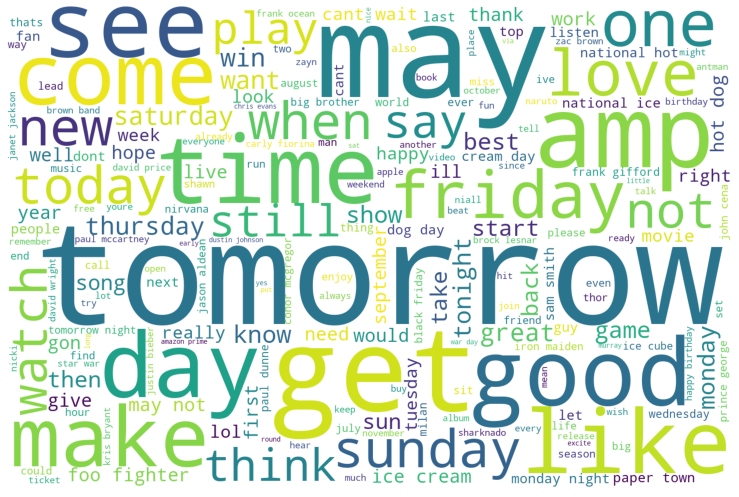

Very Positive words


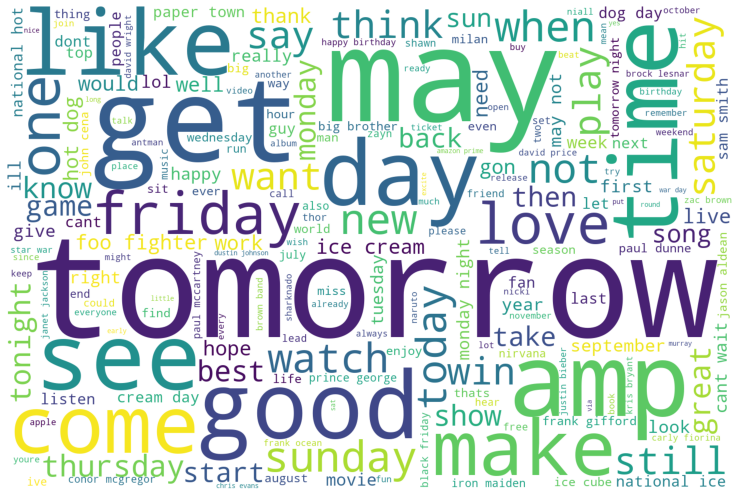

Negative words


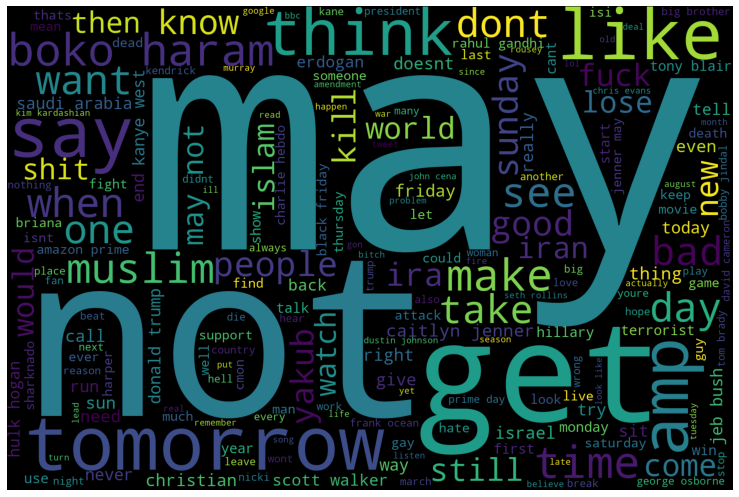

Very Negative words


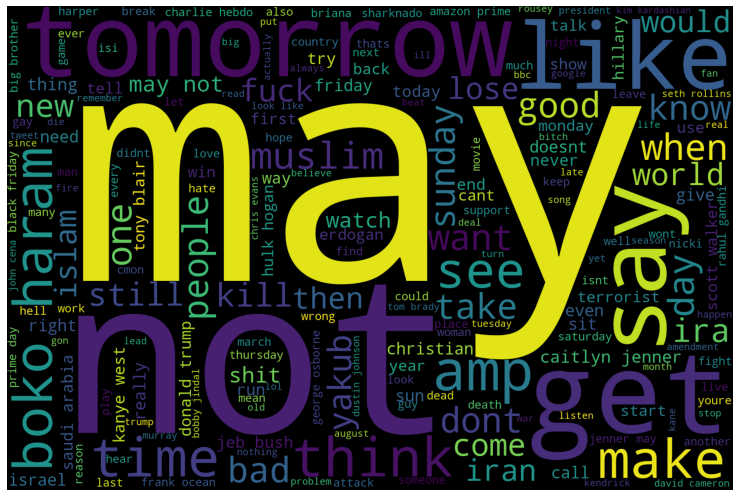

Neutral words


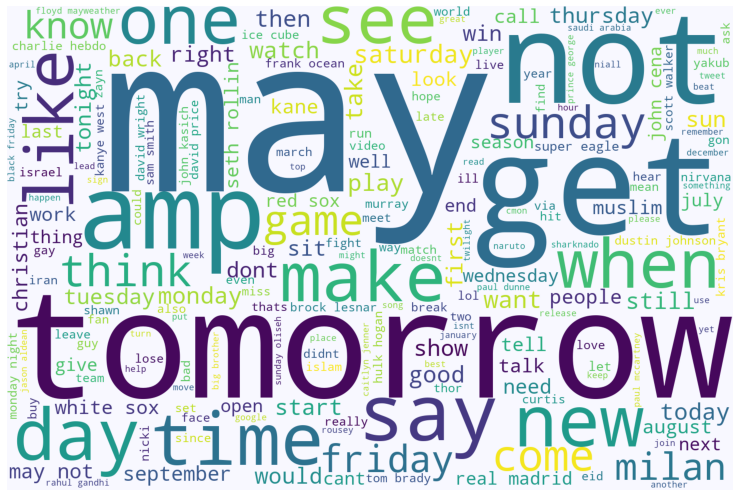

CPU Time: 16.39610743522644


In [51]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS
very_positive_words = []
positive_words = []
very_negative_words = []
negative_words = []
neutral_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words seperately
for i in range(len(data_pro)):
    if df['sentiment'][i] == 1:
        positive_words.extend(data_pro[i])
    elif df['sentiment'][i] == -1:
        negative_words.extend(data_pro[i])
    elif df['sentiment'][i] == 0:
        neutral_words.extend(data_pro[i])
    elif df['sentiment'][i] == -2:
        very_negative_words.extend(data_pro[i])
    elif df['sentiment'][i] == 2:
        very_positive_words.extend(data_pro[i])
        

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black',title = 'positive'):
    wordcloud = WordCloud(stopwords = stop,
                          background_color = color,
                          width = 1500,
                          height = 1000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./Datasets/english/plot/cloud_%s.jpg'%title)
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white',title = 'positive')
print("Very Positive words")
wordcloud_draw(positive_words, 'white',title = 'very positive')
print("Negative words")
wordcloud_draw(negative_words,title = 'nagative')        
print("Very Negative words")
wordcloud_draw(negative_words,title = 'very nagative')        
print("Neutral words")
wordcloud_draw(neutral_words,'ghostwhite',title = 'neutral') 

print('CPU Time:', time() - start_time)

## word to vector

In [67]:
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

In [49]:
path_to_glove_file = "./glove.twitter.27B.200d.txt"

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors,Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = "./glove.twitter.27B.200d.txt"
tmp_file = get_tmpfile("./glove.twitter.27B.200d.word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

w2v_model = KeyedVectors.load_word2vec_format(tmp_file)


In [ ]:
#w2v_model.save('./w2vmodel/glove_twitter_200d.model')

In [69]:
w2v_model = KeyedVectors.load("./Datasets/w2v_model/glove_w2v.model")

In [70]:
word_dict = {}
for word in list(w2v_model.index_to_key):
    word_dict[word] = w2v_model[word]
word_dict.values

<function dict.values>

In [83]:
embedding_model.vector_size

200

In [73]:
embedding_model = w2v_model
Embedding_dim = embedding_model.vector_size


word2idx = {'PAD': 0}
# 所有词对应的嵌入向量 [(word, vector)]
vocab_list = [word for word in enumerate(embedding_model.key_to_index.keys())]
embeddings_matrix = np.zeros((len(vocab_list) + 1,embedding_model.vector_size))
# word2idx 字典
for i in range(len(vocab_list)):
    word = vocab_list[i][1]
    word2idx[word] = i + 1
    embeddings_matrix[i + 1] = word_dict[word]

# 初始化keras中的Embedding层权重
embedding_layer = Embedding(input_dim=len(embeddings_matrix),
                  output_dim=Embedding_dim,
                  weights=[embeddings_matrix], # 预训练参数
                  trainable=False)

In [74]:
Y = np.zeros((len(df), ))

for i  in range(len(df)):
    Y[i] = df['sentiment'][i]

In [75]:
from tensorflow.keras.utils import to_categorical
Y1 = to_categorical(Y,5)
Y1

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
#########################################################################################

In [112]:
start_time = time()

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index


# Here we will utilize the already computed 'cleaned_tokens_list' variable
   
#print('Removed Noise, CPU Time:', time() - start_time)
#start_time = time()

list_len = [len(i) for i in data_pro]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(data_pro), max_len))


for i, tk_lb in enumerate(data_pro):
    tokens= tk_lb
    sentence_to_indices(tokens, embedding_model.key_to_index, max_len, i)

    
#print('Data Prepared for model, CPU Time:', time() - start_time)


max_len: 545


In [ ]:
##########################################################################

In [88]:
unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res
def create_data(data_pro,word_to_index):
    list_len = [len(i) for i in data_pro]
    max_len = max(list_len)
    print('max_len:', max_len)

    X = np.zeros((len(data_pro), max_len))


    for i, tk_lb in enumerate(data_pro):
        tokens= tk_lb
        sentence_indices = []
        for j, w in enumerate(tokens):
            try:
                index = word_to_index[w]
            except:
                UNKS.append(w)
                w = cleared(w)
                try:
                    index = word_to_index[w]
                except:
                    index = word_to_index['unk']
                    unks.append(w)
            X[i, j] = index
    return X

X = create_data(data_pro,embedding_model.key_to_index)
X_topic = create_data(topic_pro,embedding_model.key_to_index)

max_len: 562
max_len: 4


In [102]:
X_merge = []
for i in range(len(X)):
    X_merge.append((X[i],X_topic[i]))
X_merge[:5]

[(array([  8607., 201534.,   5209.,    353., 265593.,   4885., 201534.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,  

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_merge, Y1, test_size=0.3, random_state=22, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=22, stratify=Y_test)

In [156]:
def split_data(x):
    tweet = np.zeros((len(x), len(x[0][0])))
    topic = np.zeros((len(x), len(x[0][1])))
    for i in range(len(x)):
        tweet[i] = x[i][0]
        topic[i] = x[i][1]
    return tweet,topic

X_train_tweet,X_train_topic = split_data(X_train)
X_val_tweet,X_val_topic= split_data(X_val)
X_test_tweet,X_test_topic = split_data(X_test)

## model

In [93]:
my_seed = 22
np.random.seed(my_seed)

In [65]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(embedding_layer)
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))

model.add(Dropout(rate=0.4))
model.add(Bidirectional(LSTM(units=256, return_sequences=False)))

model.add(Dropout(rate=0.4))
#model.add(Dense(units=1, activation='sigmoid'))

model.add(Dense(units=64,kernel_initializer="uniform",activation='relu'))        
model.add(Dense(units=3,kernel_initializer="uniform",activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         238703000 
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         336896    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [108]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(embedding_layer)
model.add(Bidirectional(LSTM(64,return_sequences=True), merge_mode = 'concat'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.4))
#concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense((3), activation="softmax"))


model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         40000100  
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         84480     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

## hybrid model lstm+cnn

In [136]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.
def hybrid_lstm_cnn():
    model = Sequential()

    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.1))
    model.add(Bidirectional(LSTM(64,return_sequences=True,recurrent_dropout = 0.4), merge_mode = 'concat'))
    model.add(Bidirectional(LSTM(64,return_sequences=True,recurrent_dropout = 0.4), merge_mode = 'concat'))
    #model.add(LSTM(64,return_sequences=True))
    model.add(Conv1D(64,4,activation="relu" ))
    model.add(MaxPooling1D(pool_size=2)) 
    model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense((3), activation="softmax"))
    model.summary()
    
    return model
    

## CNN+LSTM

In [131]:
def hybrid_cnn_lstm():
    
    model = Sequential()

    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))  
    model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))  
    model.add(Bidirectional(LSTM(64,return_sequences=True,recurrent_dropout = 0.4), merge_mode = 'concat'))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(128,return_sequences=True), merge_mode = 'concat'))
    #model.add(LSTM(64,return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.4))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense((3), activation="softmax"))
    model.summary()
    
    return model
    

SyntaxError: invalid syntax (Temp/ipykernel_16284/4165035635.py, line 1)

In [ ]:
def model_for_tweet()
    model = Sequential()

    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(64,return_sequences=True), merge_mode = 'concat'))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.4))
    #concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
    
    (562,)
    model.summary()


def model_for_topic()
    model = Sequential()

    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(32,return_sequences=True), merge_mode = 'concat'))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.4))
    #concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
    model.summary()
    
    
    
    
model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense((3), activation="softmax"))

In [151]:
def create_model(tweet,topic):
    inputA = Input(shape=tweet[0].shape)
    inputB = Input(shape=topic[0].shape)

    # the first branch operates on the first input
    x = embedding_layer(inputA)
    x = Bidirectional(LSTM(64,return_sequences=True), merge_mode = 'concat')(x)
    x = GlobalMaxPool1D()(x)
    x = Model(inputs=inputA, outputs=x)

    # the second branch opreates on the second input
    y = embedding_layer(inputB)
    y = LSTM(64,return_sequences=True)(y)
    y = GlobalMaxPool1D()(y)
    y = Model(inputs=inputB, outputs=y)

    # combine the output of the two branches
    combined = keras.layers.concatenate([x.output, y.output])

    # apply a FC layer and then a regression prediction on the
    # combined outputs

    z = Dense(64, activation="relu")(combined)
    z = Dense(5, activation="softmax")(z)

    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[x.input, y.input], outputs=z)
    model.summary()
    return model

In [152]:
model = create_model(X,X_topic)

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 562)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           multiple             40000100    input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 562, 128)     84480       embedding[8][0]            

In [153]:
optimizer =tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='CategoricalCrossentropy', optimizer=optimizer, metrics=['accuracy'])

In [154]:
filepath='./data/weights.best-glove200-lstm-cnn.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath= filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='min', verbose=1, restore_best_weights = True)
callbacks_list = [checkpoint,earlyStop]

In [ ]:
model.fit([X_train_tweet,X_train_topic], Y_train, validation_data=([X_val_tweet,X_val_topic], Y_val), epochs = 50, batch_size = 128, shuffle=True,callbacks=callbacks_list)

Epoch 1/50
 26/145 [====>.........................] - ETA: 5:32 - loss: 1.1959 - accuracy: 0.4354

In [ ]:

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res
def create_data(data_pro,word_to_index)
    list_len = [len(i) for i in data_pro]
    max_len = max(list_len)
    print('max_len:', max_len)

    X = np.zeros((len(data_pro), max_len))


    for i, tk_lb in enumerate(data_pro):
        tokens= tk_lb
        sentence_to_indices(tokens, embedding_model.key_to_index, max_len, i,)
        sentence_indices = []
         for j, w in enumerate(tokens):
            try:
                index = word_to_index[w]
            except:
                UNKS.append(w)
                w = cleared(w)
                try:
                    index = word_to_index[w]
                except:
                    index = word_to_index['unk']
                    unks.append(w)
            X[i, j] = index
    return X
data = (data_pro,embedding_model.key_to_index)

In [ ]:
model.save('./lstm-4-7.h5')

In [126]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

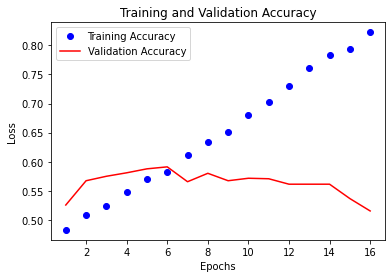

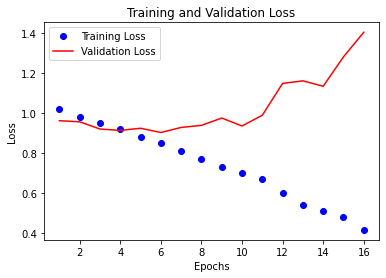

In [127]:
plot_acc_loss(model.history)

In [128]:
test_x = pickle.load(open('./data/x_test.p', "rb"))
test_y = pickle.load(open('./data/y_test_categorical.p', "rb"))

In [129]:
unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res
def create_data(data_pro,word_to_index):
    list_len = [len(i) for i in data_pro]
    max_len = max(list_len)
    print('max_len:', max_len)

    X = np.zeros((len(data_pro), max_len))


    for i, tk_lb in enumerate(data_pro):
        tokens= tk_lb
        sentence_indices = []
        for j, w in enumerate(tokens):
            try:
                index = word_to_index[w]
            except:
                UNKS.append(w)
                w = cleared(w)
                try:
                    index = word_to_index[w]
                except:
                    index = word_to_index['unk']
                    unks.append(w)
            X[i, j] = index
    return X
test_x = create_data(test_x,embedding_model.key_to_index)

max_len: 22


In [130]:
model.evaluate(test_x,test_y)

645/645 [==============================] - 9s 12ms/step - loss: 1.0233 - accuracy: 0.4402


[1.0232776403427124, 0.44023847579956055]

In [144]:
gensim.__version__

'4.1.2'